## DSTA

#### Rating and Ranking with Markov's Method:

#### The Premier League case

This is the __solution__ notebook.

We will analyse Premier League results for these two interesting seasons; results have been downloaded from [www.footballwebpages.co.uk](https://www.footballwebpages.co.uk/premier-league):

- the [2021 - 2022 season](https://www.footballwebpages.co.uk/premier-league/match-grid/2021-2022), and
- [2022 - 2023 season](https://www.footballwebpages.co.uk/premier-league/match-grid/2022-2023).




### Import necessary Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Set Pandas and Numpy options for printing results

In [3]:
np.set_printoptions(linewidth=2000)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.colheader_justify', 'center')

### Premier League winners:

*   **2021 - 2022**: Manchester City (1-point gap from Liverpool that finished second)
  
*   **2022 - 2023**: Manchester City (5-points gap from Arsenal that finished second)



### File names

In [4]:
# League table files
premier_league_table_2017_2018 = "./data/2017_2018_LeagueTable.csv"
premier_league_table_2018_2019 = "./data/2018_2019_LeagueTable.csv"
premier_league_table_2019_2020 = "./data/2019_2020_LeagueTable.csv"
premier_league_table_2020_2021 = "./data/2020_2021_LeagueTable.csv"
premier_league_table_2021_2022 = "./data/2021_2022_LeagueTable.csv"
premier_league_table_2022_2023 = "./data/2022_2023_LeagueTable.csv"

# Match grid files
premier_league_match_grid_2017_2018 = "./data/2017_2018_MatchGrid.csv"
premier_league_match_grid_2018_2019 = "./data/2018_2019_MatchGrid.csv"
premier_league_match_grid_2019_2020 = "./data/2017_2018_MatchGrid.csv"
premier_league_match_grid_2020_2021 = "./data/2020_2021_MatchGrid.csv"
premier_league_match_grid_2021_2022 = "./data/2021_2022_MatchGrid.csv"
premier_league_match_grid_2022_2023 = "./data/2022_2023_MatchGrid.csv"

### Set current working data files and next season files

Hint: Change these variables in case you would like to rate / rank teams based on a different season and check the estimates against the actual rankings of the following season.

In [5]:
# Current (working) season
current_league_table_file = premier_league_table_2021_2022

current_match_grid_file = premier_league_match_grid_2021_2022

current_season = "2021 - 2022"

# Merged results of current season from Massey and Keener
merged_results_2021_2022 = "./data/2021_2022_MergedResults.csv"

# Next season
coming_league_table_file = premier_league_table_2022_2023

coming_match_grid_file = premier_league_match_grid_2022_2023

coming_season = "2022 - 2023"

### Markov's method

#### For Markov we need again the match grid

In [6]:
# Each match entry is in the format ="GH-GA" (except from NaN in diagonal).
# GH are goals scored by the home team, and GA are goals scored by the away team
# Below, we read the match grid CSV and remove '=' and '"'

match_grid = (
    pd.read_csv(current_match_grid_file, dtype=str, index_col=0)
    .replace('"' , '', regex=True)
    .replace('=' , '', regex=True)
    .fillna("0-0")
    )

match_grid

,Arsenal,Aston Villa,Brentford,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Leeds United,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Norwich City,Southampton,Tottenham Hotspur,Watford,West Ham United,Wolverhampton Wanderers
Arsenal,0-0,3-1,2-1,1-2,0-0,0-2,2-2,5-1,2-1,2-0,0-2,1-2,3-1,2-0,1-0,3-0,3-1,1-0,2-0,2-1
Aston Villa,0-1,0-0,1-1,2-0,1-1,1-3,1-1,3-0,3-3,2-1,1-2,1-2,2-2,2-0,2-0,4-0,0-4,0-1,1-4,2-3
Brentford,2-0,2-1,0-0,0-1,2-0,0-1,0-0,1-0,1-2,1-2,3-3,0-1,1-3,0-2,1-2,3-0,0-0,2-1,2-0,1-2
Brighton & Hove Albion,0-0,0-2,2-0,0-0,0-3,1-1,1-1,0-2,0-0,2-1,0-2,1-4,4-0,1-1,0-0,2-2,0-2,2-0,3-1,0-1
Burnley,0-1,1-3,3-1,1-2,0-0,0-4,3-3,3-2,1-1,0-2,0-1,0-2,1-1,1-2,0-0,2-0,1-0,0-0,0-0,1-0
Chelsea,2-4,3-0,1-4,1-1,1-1,0-0,3-0,1-1,3-2,1-1,2-2,0-1,1-1,1-0,7-0,3-1,2-0,2-1,1-0,2-2
Crystal Palace,3-0,1-2,0-0,1-1,1-1,0-1,0-0,3-1,0-0,2-2,1-3,0-0,1-0,1-1,3-0,2-2,3-0,1-0,2-3,2-0
Everton,2-1,0-1,2-3,2-3,3-1,1-0,3-2,0-0,3-0,1-1,1-4,0-1,1-0,1-0,2-0,3-1,0-0,2-5,0-1,0-1
Leeds United,1-4,0-3,2-2,1-1,3-1,0-3,1-0,2-2,0-0,1-1,0-3,0-4,2-4,0-1,2-1,1-1,0-4,1-0,1-2,1-1
Leicester City,0-2,0-0,2-1,1-1,2-2,0-3,2-1,1-2,1-0,0-0,1-0,0-1,4-2,4-0,3-0,4-1,2-3,4-2,2-2,1-0


#### Create Markov's V matrix

Below is a refresher

$V_{n \times n}$ where $V_{ij}:$ Total goals conceded from team *i* against team *j*

Here *n* represents the number of teams in the league

#### Create Markov's S matrix

Below is a refresher

$S_{n \times n}$ where $S_{ij}:$ Total goals team *i* conceded from team *j,* divided by the total goals team *i* conceded.

Again, *n* here represents the number of teams in the league

#### Exercise 1: Complete the code to calculate Markov's V and S matrices

#### Step-by-step:

1.   Parse scores. Example: "3-2". The home team scored 3 goals and the away team 2.

   Hint: Pandas [applymap documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html)

2.   Match every team's home match with the respective away match against the same opponent.

   Hint: The home match of team *i* against *j* is element *ij*. The respective away match is element *ji* - row and column indexes are swapped...

In [7]:
# Parse score and get goals conceded at home
home_goals_ij = lambda score: int(score.split("-")[1])
all_home_goals_ij = match_grid.map(home_goals_ij)

# Parse score and get goals conceded away
# The grid is transposed to match every team's respective
# home and away matches
away_goals_ij = lambda score: int(score.split("-")[0])
all_away_goals_ij = match_grid.map(away_goals_ij)

# Sum goals conceded
V_dataframe = all_home_goals_ij + all_away_goals_ij

In [8]:
# row_sums: Sum of goals each team conceded
row_sums = V_dataframe.sum(axis=1)

# Create S matrix
S_dataframe = V_dataframe.div(row_sums, axis=0)

#### Create transition and counter dictionaries

In [9]:
# Dictionary with teams as keys and lists of probabilities as values
# Each list represents a probability of moving from current team
# to another team of the league (fair-weather fan logic)
transit_dict = S_dataframe.T.to_dict(orient = "list")

teams = S_dataframe.columns.tolist()

# Dictionary with teams as keys and number of visits as values
counter_dict = {team: 0 for team in teams}

#### Run Markov simulation with fair-weather fan

In [10]:
N = 100_000

# Initialize process by randomly selecting a team
curr_team = np.random.choice(teams)
counter_dict[curr_team] += 1

# Run the simulation
for i in range(N):
    probs = transit_dict[curr_team]
    curr_team = np.random.choice(teams, p = probs)
    counter_dict[curr_team] += 1

# Get the ratings
ratings = [count / (N + 1) for count in counter_dict.values()]
markov_df = (
    pd.DataFrame(ratings, index = teams, columns=["Markov_Rating"])
    .sort_values(by="Markov_Rating", ascending=False)
    )

#### Use a MinMaxScaler to scale Markov ratings between 0 and 100 for plotting.

Please see the relative [sklearn MinMaxScaler documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [11]:
# Scale the ratings between 100 (top team) and 0 (weakest team).
# MinMaxScaler accepts a tuple (min, max) as input argument to define the range.
min_max_scaler = MinMaxScaler((0, 100))
markov_df["Markov_Scaled_Rating"] = min_max_scaler.fit_transform(
    markov_df.loc[:, "Markov_Rating"].values.reshape(-1, 1)
    )

#### Add Markov ranking.

In [12]:
# Add Markov ranking
markov_df["Markov_Ranking"] = np.arange(1, 21)

markov_df

,Markov_Rating,Markov_Scaled_Rating,Markov_Ranking
Southampton,0.060229,100.000000,1
Liverpool,0.060079,99.435454,2
Leicester City,0.057779,90.779074,3
Brentford,0.057499,89.725254,4
Leeds United,0.057469,89.612345,5
Manchester United,0.055919,83.778698,6
Arsenal,0.053249,73.729770,7
Everton,0.052909,72.450132,8
Newcastle United,0.049760,60.594656,9
Norwich City,0.048700,56.605194,10


#### Add Markov results to the match grid table

In [13]:
match_grid = match_grid.join(markov_df)
match_grid

,Arsenal,Aston Villa,Brentford,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Leeds United,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Norwich City,Southampton,Tottenham Hotspur,Watford,West Ham United,Wolverhampton Wanderers,Markov_Rating,Markov_Scaled_Rating,Markov_Ranking
Arsenal,0-0,3-1,2-1,1-2,0-0,0-2,2-2,5-1,2-1,2-0,0-2,1-2,3-1,2-0,1-0,3-0,3-1,1-0,2-0,2-1,0.053249,73.729770,7
Aston Villa,0-1,0-0,1-1,2-0,1-1,1-3,1-1,3-0,3-3,2-1,1-2,1-2,2-2,2-0,2-0,4-0,0-4,0-1,1-4,2-3,0.043480,36.958976,17
Brentford,2-0,2-1,0-0,0-1,2-0,0-1,0-0,1-0,1-2,1-2,3-3,0-1,1-3,0-2,1-2,3-0,0-0,2-1,2-0,1-2,0.057499,89.725254,4
Brighton & Hove Albion,0-0,0-2,2-0,0-0,0-3,1-1,1-1,0-2,0-0,2-1,0-2,1-4,4-0,1-1,0-0,2-2,0-2,2-0,3-1,0-1,0.040800,26.872412,19
Burnley,0-1,1-3,3-1,1-2,0-0,0-4,3-3,3-2,1-1,0-2,0-1,0-2,1-1,1-2,0-0,2-0,1-0,0-0,0-0,1-0,0.043150,35.716974,18
Chelsea,2-4,3-0,1-4,1-1,1-1,0-0,3-0,1-1,3-2,1-1,2-2,0-1,1-1,1-0,7-0,3-1,2-0,2-1,1-0,2-2,0.048580,56.153557,11
Crystal Palace,3-0,1-2,0-0,1-1,1-1,0-1,0-0,3-1,0-0,2-2,1-3,0-0,1-0,1-1,3-0,2-2,3-0,1-0,2-3,2-0,0.047820,53.293188,14
Everton,2-1,0-1,2-3,2-3,3-1,1-0,3-2,0-0,3-0,1-1,1-4,0-1,1-0,1-0,2-0,3-1,0-0,2-5,0-1,0-1,0.052909,72.450132,8
Leeds United,1-4,0-3,2-2,1-1,3-1,0-3,1-0,2-2,0-0,1-1,0-3,0-4,2-4,0-1,2-1,1-1,0-4,1-0,1-2,1-1,0.057469,89.612345,5
Leicester City,0-2,0-0,2-1,1-1,2-2,0-3,2-1,1-2,1-0,0-0,1-0,0-1,4-2,4-0,3-0,4-1,2-3,4-2,2-2,1-0,0.057779,90.779074,3


#### Import the league table to get actual rankings and points scored

In [14]:
# Read the league table data - skip the first row
league_table = pd.read_csv(current_league_table_file, skiprows = 1)

league_table["Actual_Ranking"] = np.arange(1, 21)

league_table

,Unnamed: 0,Unnamed: 1,P,W,D,L,P.1,W.1,D.1,L.1,P.2,W.2,D.2,L.2,F,A,+/-,Pts,Actual_Ranking
0,C,Manchester City,19,15,2,2,19,14,4,1,38,29,6,3,99,26,73,93,1
1,2,Liverpool,19,15,4,0,19,13,4,2,38,28,8,2,94,26,68,92,2
2,3,Chelsea,19,9,7,3,19,12,4,3,38,21,11,6,76,33,43,74,3
3,4,Tottenham Hotspur,19,13,1,5,19,9,4,6,38,22,5,11,69,40,29,71,4
4,5,Arsenal,19,13,2,4,19,9,1,9,38,22,3,13,61,48,13,69,5
5,6,Manchester United,19,10,5,4,19,6,5,8,38,16,10,12,57,57,0,58,6
6,7,West Ham United,19,9,5,5,19,7,3,9,38,16,8,14,60,51,9,56,7
7,8,Leicester City,19,10,4,5,19,4,6,9,38,14,10,14,62,59,3,52,8
8,9,Brighton & Hove Albion,19,5,7,7,19,7,8,4,38,12,15,11,42,44,-2,51,9
9,10,Wolverhampton Wanderers,19,7,3,9,19,8,3,8,38,15,6,17,38,43,-5,51,10


#### We keep only teams, actual ranking and points.

In [15]:
required_cols = ["Unnamed: 1", "Pts", "Actual_Ranking"]

renaming = {"Unnamed: 1": "Teams", "Pts": "Points"}

# Make a copy of the league table, keeping only the necessary columns renamed
# Index is reset as the teams for the table join below
league_table = (
    league_table
    .loc[:, required_cols]
    .copy()
    .rename(columns=renaming)
    .set_index("Teams")
)

league_table

,Points,Actual_Ranking
Teams,,
Manchester City,93,1
Liverpool,92,2
Chelsea,74,3
Tottenham Hotspur,71,4
Arsenal,69,5
Manchester United,58,6
West Ham United,56,7
Leicester City,52,8
Brighton & Hove Albion,51,9


#### Join the match grid that holds Markov ratings with the league table and the actual ratings based on team names

In [16]:
match_grid = match_grid.join(league_table)

match_grid

,Arsenal,Aston Villa,Brentford,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Leeds United,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Norwich City,Southampton,Tottenham Hotspur,Watford,West Ham United,Wolverhampton Wanderers,Markov_Rating,Markov_Scaled_Rating,Markov_Ranking,Points,Actual_Ranking
Arsenal,0-0,3-1,2-1,1-2,0-0,0-2,2-2,5-1,2-1,2-0,0-2,1-2,3-1,2-0,1-0,3-0,3-1,1-0,2-0,2-1,0.053249,73.729770,7,69,5
Aston Villa,0-1,0-0,1-1,2-0,1-1,1-3,1-1,3-0,3-3,2-1,1-2,1-2,2-2,2-0,2-0,4-0,0-4,0-1,1-4,2-3,0.043480,36.958976,17,45,14
Brentford,2-0,2-1,0-0,0-1,2-0,0-1,0-0,1-0,1-2,1-2,3-3,0-1,1-3,0-2,1-2,3-0,0-0,2-1,2-0,1-2,0.057499,89.725254,4,46,13
Brighton & Hove Albion,0-0,0-2,2-0,0-0,0-3,1-1,1-1,0-2,0-0,2-1,0-2,1-4,4-0,1-1,0-0,2-2,0-2,2-0,3-1,0-1,0.040800,26.872412,19,51,9
Burnley,0-1,1-3,3-1,1-2,0-0,0-4,3-3,3-2,1-1,0-2,0-1,0-2,1-1,1-2,0-0,2-0,1-0,0-0,0-0,1-0,0.043150,35.716974,18,35,18
Chelsea,2-4,3-0,1-4,1-1,1-1,0-0,3-0,1-1,3-2,1-1,2-2,0-1,1-1,1-0,7-0,3-1,2-0,2-1,1-0,2-2,0.048580,56.153557,11,74,3
Crystal Palace,3-0,1-2,0-0,1-1,1-1,0-1,0-0,3-1,0-0,2-2,1-3,0-0,1-0,1-1,3-0,2-2,3-0,1-0,2-3,2-0,0.047820,53.293188,14,48,12
Everton,2-1,0-1,2-3,2-3,3-1,1-0,3-2,0-0,3-0,1-1,1-4,0-1,1-0,1-0,2-0,3-1,0-0,2-5,0-1,0-1,0.052909,72.450132,8,39,16
Leeds United,1-4,0-3,2-2,1-1,3-1,0-3,1-0,2-2,0-0,1-1,0-3,0-4,2-4,0-1,2-1,1-1,0-4,1-0,1-2,1-1,0.057469,89.612345,5,38,17
Leicester City,0-2,0-0,2-1,1-1,2-2,0-3,2-1,1-2,1-0,0-0,1-0,0-1,4-2,4-0,3-0,4-1,2-3,4-2,2-2,1-0,0.057779,90.779074,3,52,8


#### Keep Markov rating and ranking from the match grid

In [17]:
cols_to_keep = [
    "Markov_Rating",
    "Markov_Scaled_Rating",
    "Markov_Ranking"
    ]

# Data needed from Markov output - sort by actual ranking first
data_to_keep = (
    match_grid
    .sort_values("Actual_Ranking", ascending = True)
    .loc[:, cols_to_keep]
    .copy()
    )

#### Import merged data with Massey and Keener results

In [19]:
# Use Teams column as index to join it later with Markov
merged_results = pd.read_csv(merged_results_2021_2022, index_col = "Teams")

#### Merge Markov results with Massey and Keener results

In [20]:
# Merge the data
merged_results = merged_results.join(data_to_keep)

merged_results

,Points,Actual_Ranking,Massey_Rating,Massey_Scaled_Rating,Massey_Ranking,Keener_Rating,Keener_Scaled_Rating,Keener_Ranking,Markov_Rating,Markov_Scaled_Rating,Markov_Ranking
Teams,,,,,,,,,,,
Manchester City,93,1,1.825000e+00,100.000000,1,0.060258,100.000000,1,0.048310,55.137373,12
Liverpool,92,2,1.700000e+00,96.268657,2,0.049710,48.749862,10,0.060079,99.435454,2
Chelsea,74,3,1.075000e+00,77.611940,3,0.053488,67.105622,6,0.048580,56.153557,11
Tottenham Hotspur,71,4,7.250000e-01,67.164179,4,0.052127,60.493734,8,0.048050,54.158826,13
Arsenal,69,5,3.250000e-01,55.223881,5,0.048106,40.957869,13,0.053249,73.729770,7
Manchester United,58,6,-1.951293e-16,45.522388,9,0.047584,38.418787,14,0.055919,83.778698,6
West Ham United,56,7,2.250000e-01,52.238806,6,0.054980,74.356543,4,0.047540,52.239368,15
Leicester City,52,8,7.500000e-02,47.761194,8,0.046270,32.033748,17,0.057779,90.779074,3
Brighton & Hove Albion,51,9,-5.000000e-02,44.029851,11,0.049921,49.772995,9,0.040800,26.872412,19


#### Plot Markov's scaled rating and ranking side by side with actual ranking and points scored

Documentation for [matplotlib.pyplot horizontal bar plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html)

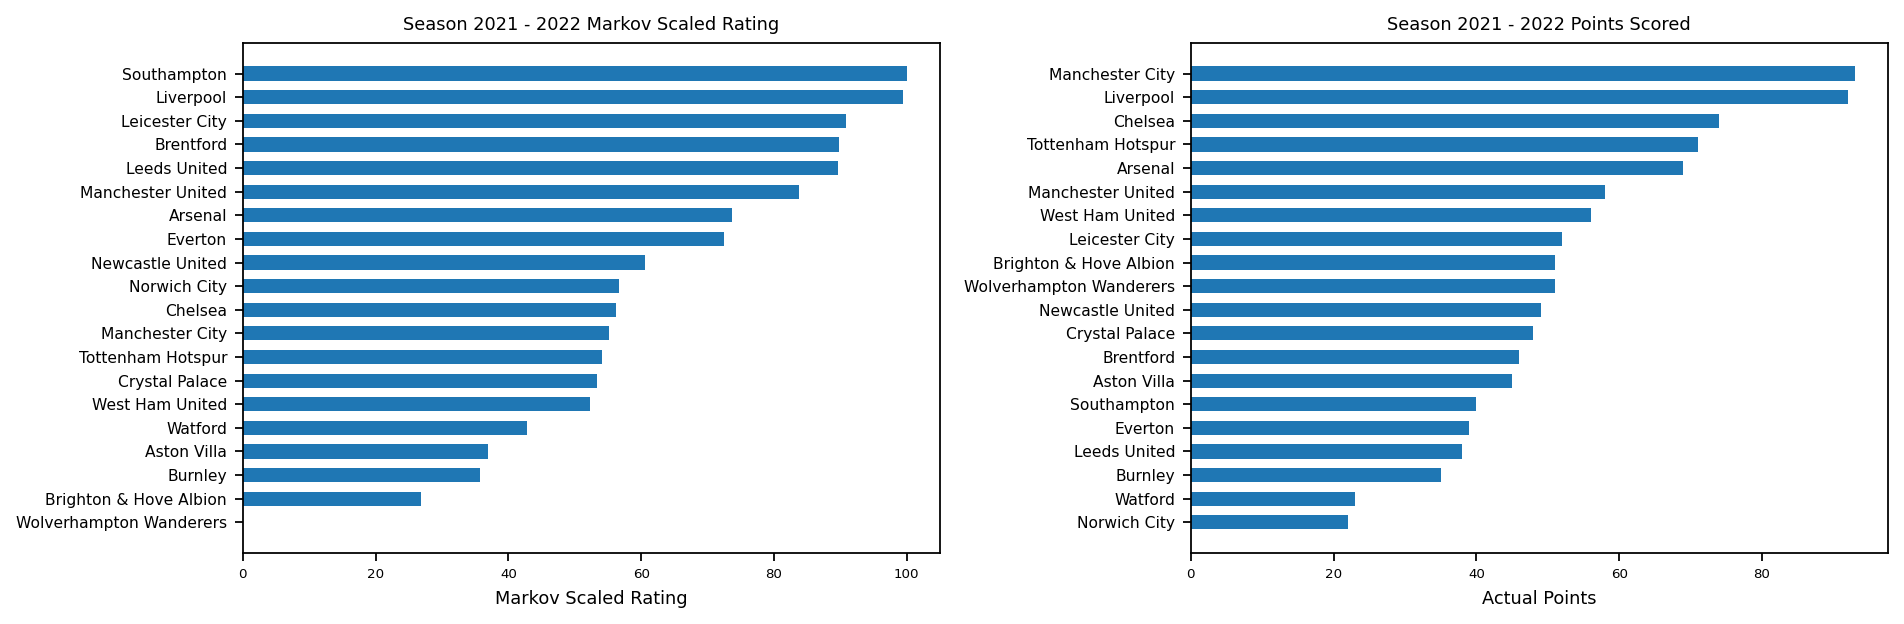

In [21]:
# Initialize grid of plots
figure, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4), dpi = 160)

# Plot Keener scaled rating - plot 0, row 0
axis[0].barh(
    match_grid["Markov_Ranking"],
    match_grid["Markov_Scaled_Rating"],
    height = 0.6, align = 'center'
    )

# Configure y axis
axis[0].set_yticks(
    match_grid["Markov_Ranking"],
    labels = match_grid.index,
    fontsize = 7
    )

axis[0].invert_yaxis()  # labels read top-to-bottom

# X-axis and title
axis[0].tick_params(axis = "x", labelsize = 6)
axis[0].set_xlabel('Markov Scaled Rating', fontsize = 8)
axis[0].set_title(f'Season {current_season} Markov Scaled Rating', fontsize = 8)

# Plot actual ranking and point scored - plot 1, row 0
axis[1].barh(
    match_grid["Actual_Ranking"],
    match_grid["Points"],
    height = 0.6, align = 'center'
    )

# Configure y axis
axis[1].set_yticks(
    match_grid["Actual_Ranking"],
    labels = match_grid.index,
    fontsize = 7
    )
axis[1].invert_yaxis()  # labels read top-to-bottom

# X-axis and title
axis[1].tick_params(axis = "x", labelsize = 6)
axis[1].set_xlabel('Actual Points', fontsize = 8)
axis[1].set_title(f'Season {current_season} Points Scored', fontsize = 8)

# Use 'tight_layout' to avoid overlapping text
plt.tight_layout()
plt.show()

### Get rankings from all methods in a new table

In [22]:
rankings = [
    "Actual_Ranking",
    "Massey_Ranking",
    "Keener_Ranking",
    "Markov_Ranking"
    ]

ranks_df = merged_results.loc[:, rankings].copy()
ranks_df

,Actual_Ranking,Massey_Ranking,Keener_Ranking,Markov_Ranking
Teams,,,,
Manchester City,1,1,1,12
Liverpool,2,2,10,2
Chelsea,3,3,6,11
Tottenham Hotspur,4,4,8,13
Arsenal,5,5,13,7
Manchester United,6,9,14,6
West Ham United,7,6,4,15
Leicester City,8,8,17,3
Brighton & Hove Albion,9,11,9,19


In [23]:
ranks_df.corr()

,Actual_Ranking,Massey_Ranking,Keener_Ranking,Markov_Ranking
Actual_Ranking,1.000000,0.938346,0.184962,0.120301
Massey_Ranking,0.938346,1.000000,0.233083,0.004511
Keener_Ranking,0.184962,0.233083,1.000000,-0.631579
Markov_Ranking,0.120301,0.004511,-0.631579,1.000000


#### Import the table of the subsequent season to check

In [24]:
# Read the league table data - skip the first row
next_league_table = pd.read_csv(coming_league_table_file, skiprows = 1)

next_league_table["Actual_Ranking"] = np.arange(1, 21)

# Uncomment if you want to see the raw table
# league_table

#### Keep necessary columns and rename them

In [25]:
required_cols = ["Unnamed: 1", "P.2", "W.2", "D.2", "L.2", "F", 
                 "A", "+/-", "Pts", "Actual_Ranking"]

renaming = {
    "Unnamed: 1": "Teams", 
    "P.2": "Total_Matches_Played", 
    "W.2": "Total_Wins",
    "D.2": "Total_Draws",
    "L.2": "Total_Losses",
    "F": "Goals_Scored",
    "A": "Goals_Conceded",
    "+/-": "Goal_Difference",
    "Pts": "Points"
    }

# Make a copy of the league table, keeping only the necessary columns renamed
next_league_table = (
    next_league_table
    .loc[:, required_cols]
    .copy()
    .rename(columns = renaming)
)

next_league_table

,Teams,Total_Matches_Played,Total_Wins,Total_Draws,Total_Losses,Goals_Scored,Goals_Conceded,Goal_Difference,Points,Actual_Ranking
0,Manchester City,38,28,5,5,94,33,61,89,1
1,Arsenal,38,26,6,6,88,43,45,84,2
2,Manchester United,38,23,6,9,58,43,15,75,3
3,Newcastle United,38,19,14,5,68,33,35,71,4
4,Liverpool,38,19,10,9,75,47,28,67,5
5,Brighton & Hove Albion,38,18,8,12,72,53,19,62,6
6,Aston Villa,38,18,7,13,51,46,5,61,7
7,Tottenham Hotspur,38,18,6,14,70,63,7,60,8
8,Brentford,38,15,14,9,58,46,12,59,9
9,Fulham,38,15,7,16,55,53,2,52,10


#### Recall estimated rankings from Massey, Keener and Markov

In [26]:
ranks_df

,Actual_Ranking,Massey_Ranking,Keener_Ranking,Markov_Ranking
Teams,,,,
Manchester City,1,1,1,12
Liverpool,2,2,10,2
Chelsea,3,3,6,11
Tottenham Hotspur,4,4,8,13
Arsenal,5,5,13,7
Manchester United,6,9,14,6
West Ham United,7,6,4,15
Leicester City,8,8,17,3
Brighton & Hove Albion,9,11,9,19
